### Final Project for Applied Machine Learning Fall 2019

Title: *Predicting Daily London Bikeshare Usage Based on Weather Variables (Jan 2015- Jan 2017)*

Date Created: *November 24, 2019*

Group Members: *Katie Edwards, Sara Mithani, Jackie Leete*

Link to data set: https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

Explainations of all of the variables in the data set:  
"timestamp" - timestamp field for grouping the data  
"cnt" - the count of new bike shares  
"t1" - real temperature in C  
"t2" - temperature in C "feels like"   
"hum" - humidity in percentage  
"wind_speed" - wind speed in km/h  
"weather_code" - category of the weather  
"is_holiday" - boolean field - 1 holiday / 0 non holiday  
"is_weekend" - boolean field - 1 if the day is weekend  
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.  

In [1]:
#importing necessary materials
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing and reading the data
bike_df = pd.read_csv("london_merged.csv", parse_dates=['timestamp'])

In [3]:
#looking at the shape of the bikesharing data
bike_df.shape

(17414, 10)

In [4]:
#looking at first 24 hours of bikesharing data
bike_df.head(24)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [5]:
#resampling the data to be averaged over every day instead of every hour
new_bike_df = bike_df.resample('D', on = 'timestamp').agg({"cnt": np.sum, "t1": np.mean, "t2": np.mean, "hum": np.mean, "wind_speed": np.mean, "weather_code": np.mean,"is_holiday": np.mean, "is_weekend": np.mean, "season": np.mean})



In [6]:
#looking at the new shape of the data
new_bike_df.shape

(731, 9)

In [7]:
#looking at the new head of the data
new_bike_df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,9234,2.479167,0.645833,94.270833,7.500000,2.875000,0.0,1.0,3.0
2015-01-05,20372,8.041667,6.708333,80.312500,8.854167,3.333333,0.0,0.0,3.0
2015-01-06,20613,7.854167,5.333333,78.895833,16.000000,3.083333,0.0,0.0,3.0
2015-01-07,21064,7.456522,4.500000,78.108696,19.760870,2.608696,0.0,0.0,3.0
2015-01-08,15601,9.750000,7.791667,79.312500,20.479167,3.500000,0.0,0.0,3.0


In [8]:
#dropping NAs and one of the variables ("weather_code") that didn't make sense anymore after resampling
new_bike_df = new_bike_df.dropna(how='any')
new_bike_df = new_bike_df.drop(columns = "weather_code")

In [9]:
#looking at the shape of the data again
new_bike_df.shape

(730, 8)

In [10]:
#looking at the head of the data again
new_bike_df.head()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season
timestamp,,,,,,,,
2015-01-04,9234,2.479167,0.645833,94.270833,7.500000,0.0,1.0,3.0
2015-01-05,20372,8.041667,6.708333,80.312500,8.854167,0.0,0.0,3.0
2015-01-06,20613,7.854167,5.333333,78.895833,16.000000,0.0,0.0,3.0
2015-01-07,21064,7.456522,4.500000,78.108696,19.760870,0.0,0.0,3.0
2015-01-08,15601,9.750000,7.791667,79.312500,20.479167,0.0,0.0,3.0


In [11]:
#confirming no missing data in our data set
new_bike_df.isnull().sum()

cnt           0
t1            0
t2            0
hum           0
wind_speed    0
is_holiday    0
is_weekend    0
season        0
dtype: int64

In [12]:
#converting the season variable into a string variable so that we can use pd.get_dummies on it
new_bike_df.season = new_bike_df.season.astype(str)

# Get dummies
new_bike_df = pd.get_dummies(new_bike_df, prefix_sep='_')
new_bike_df.head()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0
timestamp,,,,,,,,,,,
2015-01-04,9234,2.479167,0.645833,94.270833,7.500000,0.0,1.0,0,0,0,1
2015-01-05,20372,8.041667,6.708333,80.312500,8.854167,0.0,0.0,0,0,0,1
2015-01-06,20613,7.854167,5.333333,78.895833,16.000000,0.0,0.0,0,0,0,1
2015-01-07,21064,7.456522,4.500000,78.108696,19.760870,0.0,0.0,0,0,0,1
2015-01-08,15601,9.750000,7.791667,79.312500,20.479167,0.0,0.0,0,0,0,1


/Users/mithanism/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


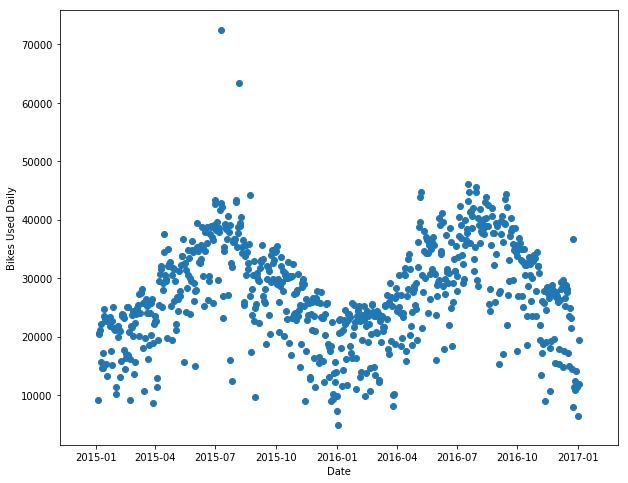

In [13]:
# Plotting the data for bikes used over the two years
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(new_bike_df.index, 
           new_bike_df["cnt"])
ax.set(xlabel='Date', ylabel='Bikes Used Daily',
       title="")
plt.show()

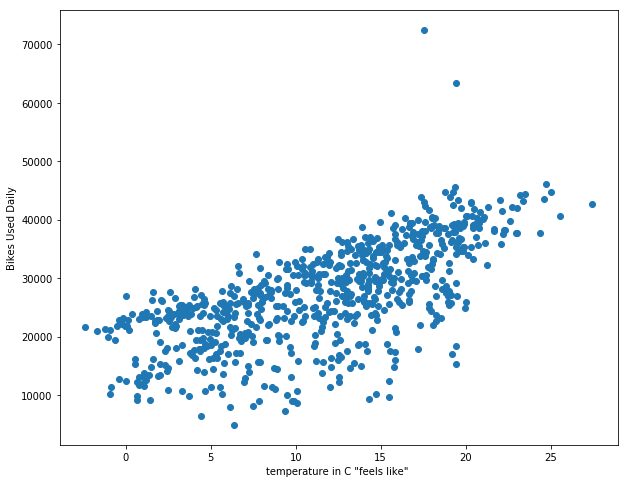

In [14]:
# Plotting the bikes used data based on temperature
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(new_bike_df["t2"], 
           new_bike_df["cnt"])
ax.set(xlabel='temperature in C "feels like" ', ylabel='Bikes Used Daily',
       title="")
plt.show()

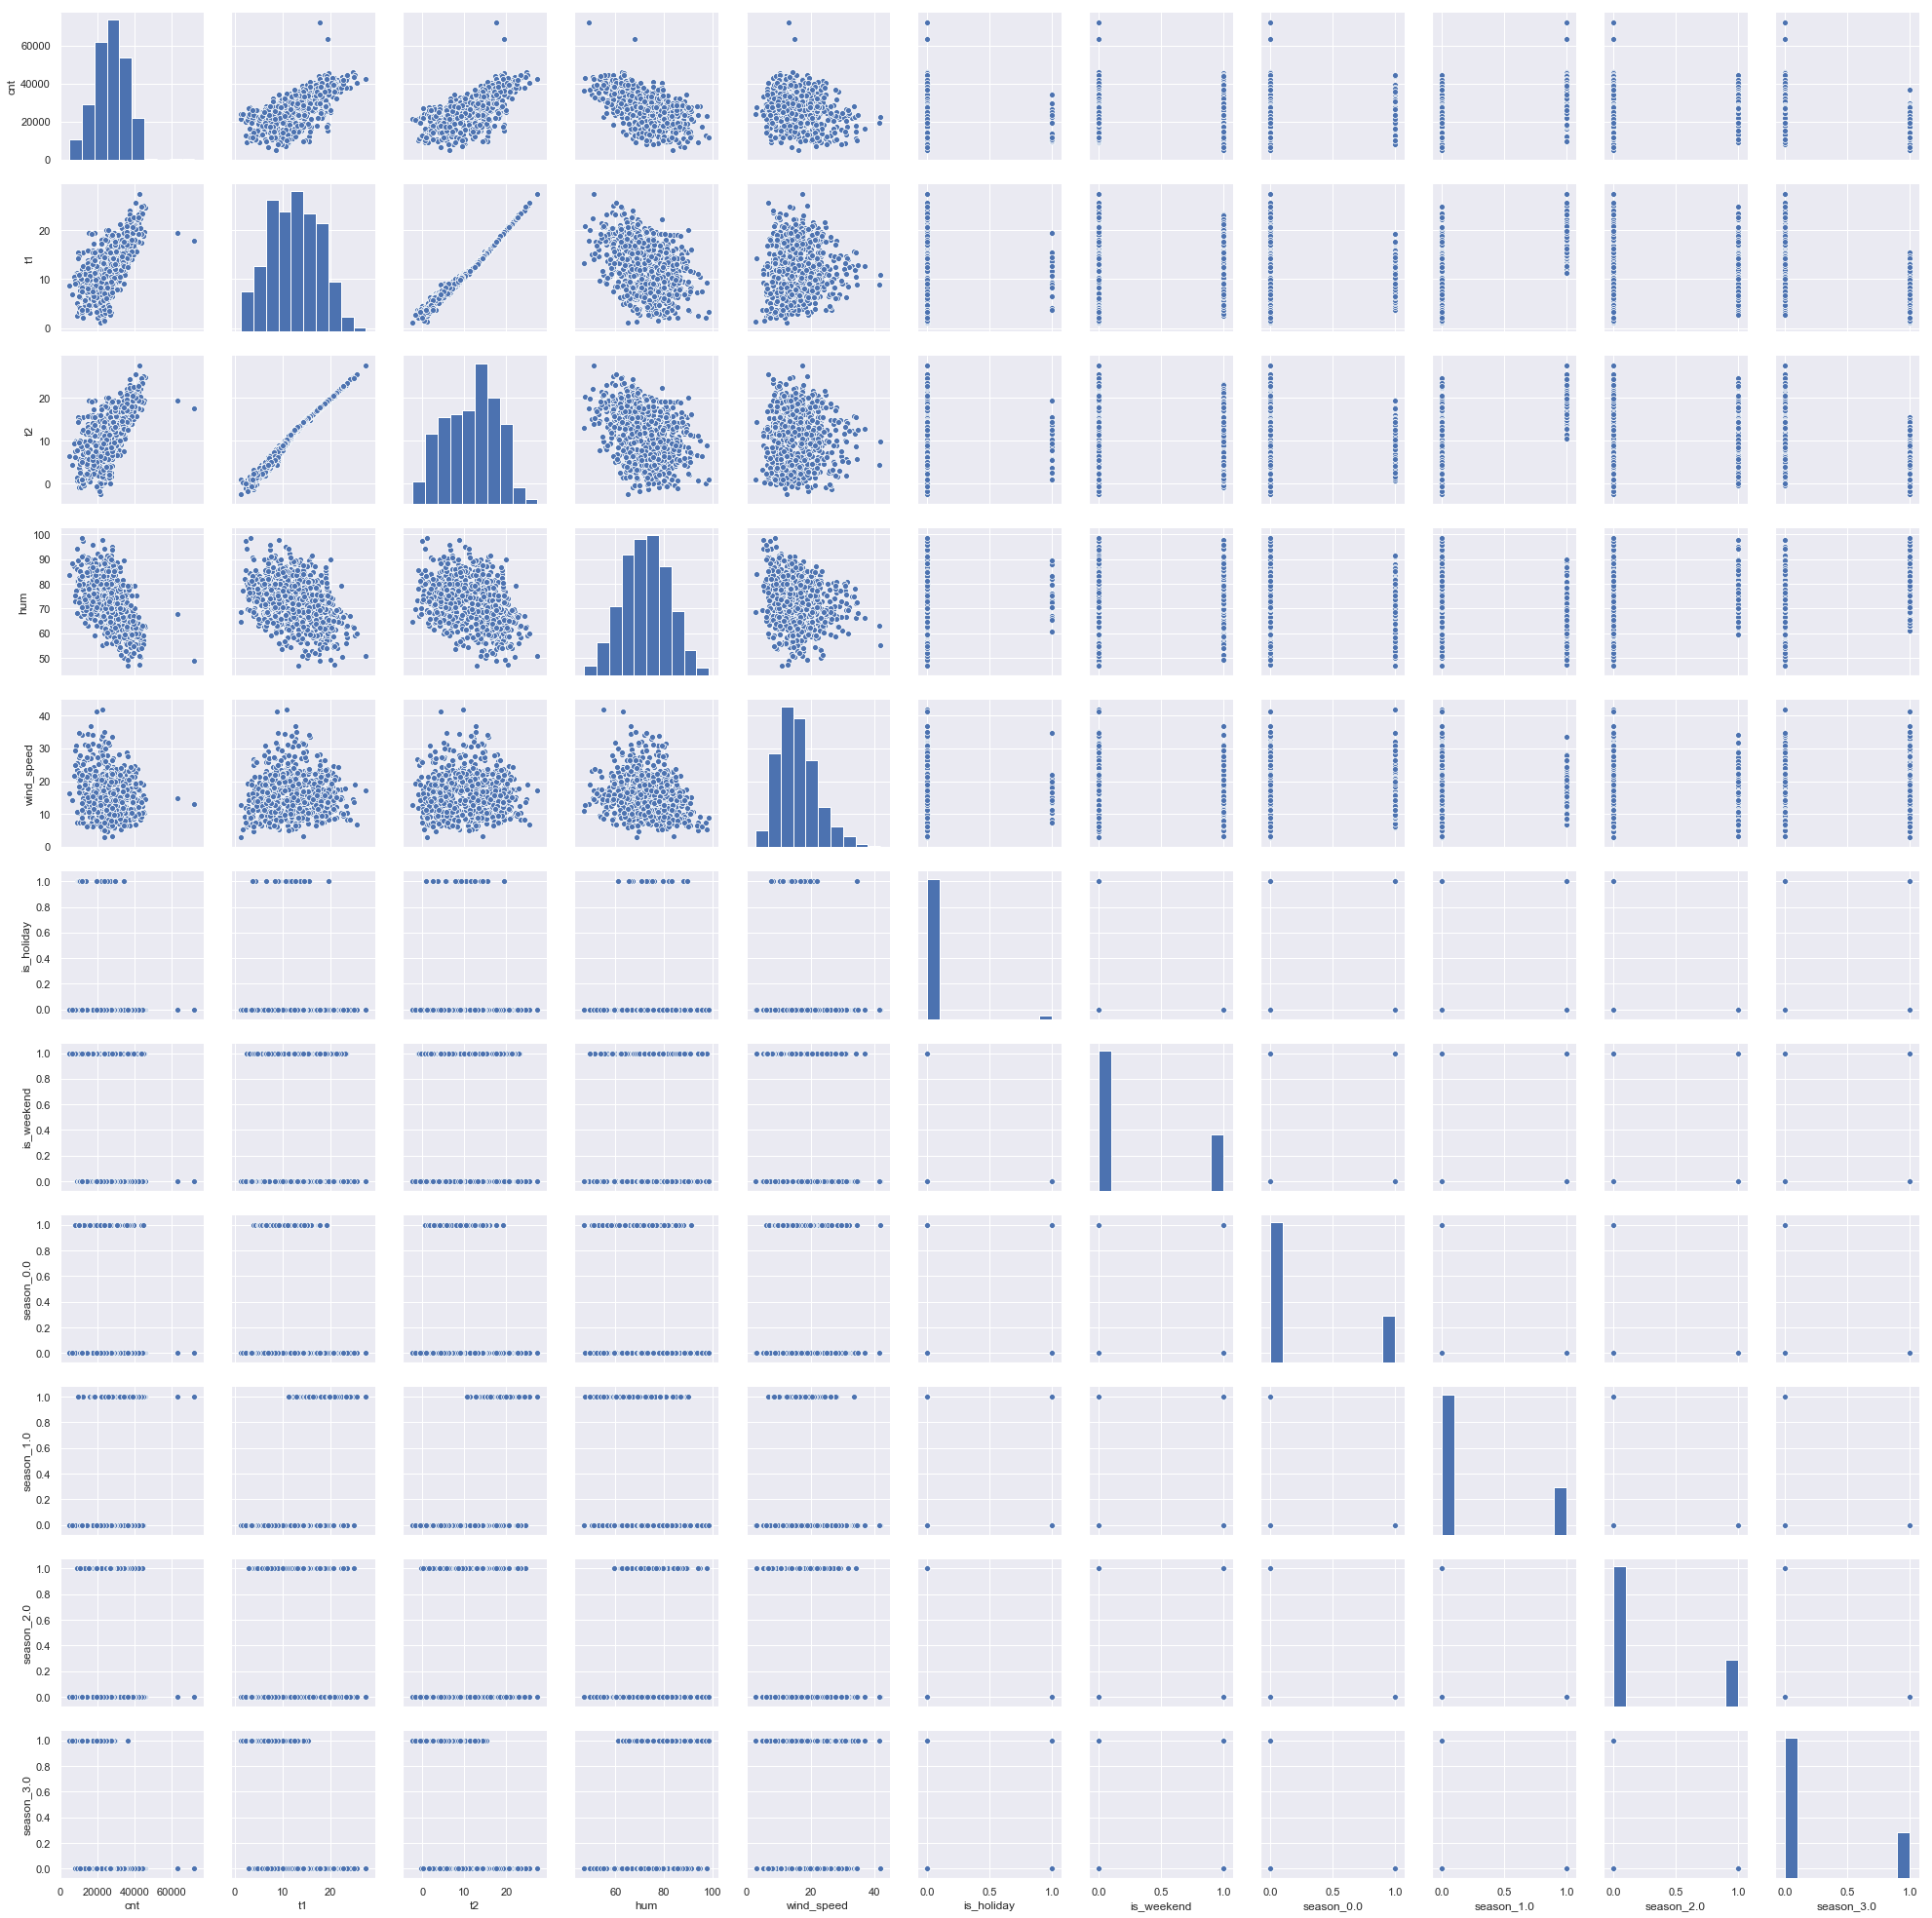

In [15]:
#pairplots for all of the variables
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(new_bike_df);

In [16]:
#Correlation table of all the variables
new_bike_df.corr()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0
cnt,1.000000,0.677384,0.676134,-0.564006,-0.197499,-0.153142,-0.296412,-0.061311,0.516137,0.050691,-0.508016
t1,0.677384,1.000000,0.992710,-0.370407,0.036309,-0.046082,-0.005675,-0.205506,0.673394,0.065146,-0.535604
t2,0.676134,0.992710,1.000000,-0.335845,-0.008522,-0.043292,-0.009053,-0.199886,0.647498,0.093443,-0.543515
hum,-0.564006,-0.370407,-0.335845,1.000000,-0.186382,0.048443,0.044033,-0.225948,-0.335404,0.227164,0.337272
wind_speed,-0.197499,0.036309,-0.008522,-0.186382,1.000000,-0.004301,0.015882,0.047056,-0.014276,-0.145154,0.112194
is_holiday,-0.153142,-0.046082,-0.043292,0.048443,-0.004301,1.000000,-0.094812,0.085484,-0.043805,-0.085954,0.044045
is_weekend,-0.296412,-0.005675,-0.009053,0.044033,0.015882,-0.094812,1.000000,0.002237,-0.004742,0.001259,0.001259
season_0.0,-0.061311,-0.205506,-0.199886,-0.225948,0.047056,0.085484,0.002237,1.000000,-0.336996,-0.333323,-0.333323
season_1.0,0.516137,0.673394,0.647498,-0.335404,-0.014276,-0.043805,-0.004742,-0.336996,1.000000,-0.333323,-0.333323
season_2.0,0.050691,0.065146,0.093443,0.227164,-0.145154,-0.085954,0.001259,-0.333323,-0.333323,1.000000,-0.329690


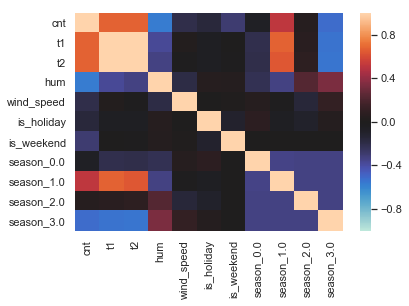

In [17]:
#Heat map based on correlation table
ax = sns.heatmap(new_bike_df.corr(), center=0, vmin=-1, vmax=1)

In [18]:
#reimporting the data to remove the timestamp (it was giving us problems with some of the analysis)
new_bike_df.to_csv(r'New_Data_Set_Bikes.csv')
new2_bike_df = pd.read_csv("New_Data_Set_Bikes.csv")
new2_bike_df = new2_bike_df.drop("timestamp", axis = 1)
new2_bike_df.head()

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0
0,9234,2.479167,0.645833,94.270833,7.500000,0.0,1.0,0,0,0,1
1,20372,8.041667,6.708333,80.312500,8.854167,0.0,0.0,0,0,0,1
2,20613,7.854167,5.333333,78.895833,16.000000,0.0,0.0,0,0,0,1
3,21064,7.456522,4.500000,78.108696,19.760870,0.0,0.0,0,0,0,1
4,15601,9.750000,7.791667,79.312500,20.479167,0.0,0.0,0,0,0,1


/Users/mithanism/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0
0,-2.096590,-1.948316,-1.770802,2.313103,-1.359833,0.0,1.0,0,0,0,1
1,-0.801745,-0.864807,-0.784902,0.842957,-1.142031,0.0,0.0,0,0,0,1
2,-0.773728,-0.901330,-1.008508,0.693749,0.007292,0.0,0.0,0,0,0,1
3,-0.721297,-0.978787,-1.144027,0.610844,0.612183,0.0,0.0,0,0,0,1
4,-1.356396,-0.532044,-0.608728,0.737634,0.727713,0.0,0.0,0,0,0,1


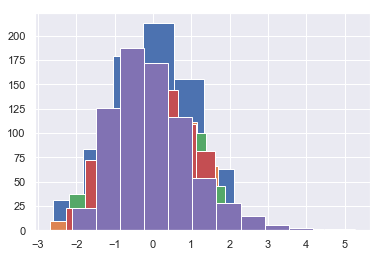

In [19]:
#Scaling all continuous variables
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df.cnt))
scaled_size.hist()
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["cnt"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df.hum))
scaled_size.hist()
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["hum"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df.t1))
scaled_size.hist()
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["t1"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df.t2))
scaled_size.hist()
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["t2"] = scaled_size
new2_bike_df.head()

scaler = StandardScaler()
scaled_size = pd.Series(scale(new2_bike_df.wind_speed))
scaled_size.hist()
scaled_size.mean()
scaled_size.std(ddof=0)
new2_bike_df["wind_speed"] = scaled_size
new2_bike_df.head()

In [20]:
#Assigning all of the columns to the data matrix, dropping the Target (temperature in C "feels like" )
X = new2_bike_df.drop('cnt', axis = 1)

X.head()


,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0
0,-1.948316,-1.770802,2.313103,-1.359833,0.0,1.0,0,0,0,1
1,-0.864807,-0.784902,0.842957,-1.142031,0.0,0.0,0,0,0,1
2,-0.901330,-1.008508,0.693749,0.007292,0.0,0.0,0,0,0,1
3,-0.978787,-1.144027,0.610844,0.612183,0.0,0.0,0,0,0,1
4,-0.532044,-0.608728,0.737634,0.727713,0.0,0.0,0,0,0,1


In [21]:
#confirming the shape of X is correct
X.shape

(730, 10)

In [22]:
#confirming the shape of y is correct
y = new2_bike_df['cnt']
y.shape

(730,)

In [23]:
#removing categorical variables, keeping continuous variables
X_cont = X.drop(["is_holiday", "is_weekend", "season_0.0", "season_1.0", "season_2.0", "season_3.0"], axis = 1)
X_cont.head()

,t1,t2,hum,wind_speed
0,-1.948316,-1.770802,2.313103,-1.359833
1,-0.864807,-0.784902,0.842957,-1.142031
2,-0.901330,-1.008508,0.693749,0.007292
3,-0.978787,-1.144027,0.610844,0.612183
4,-0.532044,-0.608728,0.737634,0.727713


In [24]:
#train test split to prepare for the linear regression model using all the continuous variables as X and y as the target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cont, y, test_size=0.33, random_state=42)

In [25]:
#confirming the shape of the training data
X_train.shape, y_train.shape

((489, 4), (489,))

In [26]:
#confirming the shape of the test data
X_test.shape, y_test.shape

((241, 4), (241,))

In [27]:
#performing the linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
predicted = LinearRegression().fit(X_train, y_train).predict(X_test)
#mean squared error
mean_squared_error(y_test, predicted)


0.35306765408166224

In [28]:
#preparing to performing the linear regression again but only with the "temperature feels like" variable (t2)
X_only_t2 = X_cont.drop(["t1", "hum", "wind_speed"], axis = 1)
X_only_t2.head()

,t2
0,-1.770802
1,-0.784902
2,-1.008508
3,-1.144027
4,-0.608728


In [29]:
#repeating train test split with t2 only
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_only_t2, y, test_size=0.33, random_state=42)

In [30]:
#repeating linear regressionwith t2 only
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
predicted = LinearRegression().fit(X_train, y_train).predict(X_test) #can only do so much to fit the data (unless you are using polynomials)
#mean squared error
mean_squared_error(y_test, predicted)

0.561481538273506

In [31]:
#KNN with all variables (continuous and categorical)
from sklearn.neighbors import KNeighborsRegressor
nnr = KNeighborsRegressor(n_neighbors=2) #n_neighbors=2 was best; mean squared error and the score get worse as K increases
nnr.fit(X, y)
y_pred_nn = nnr.predict(X)
#mean squared error
mean_squared_error(y, y_pred_nn)

0.11475047017589658

In [32]:
#KNN score
nnr.score(X, y)

0.8852495298241034

In [33]:
#KNN with only continuous variables
from sklearn.neighbors import KNeighborsRegressor
nnr = KNeighborsRegressor(n_neighbors=2) #n_neighbors=2 was best; mean squared error and the score get worse as K increases
nnr.fit(X_cont, y)
y_pred_nn = nnr.predict(X_cont)
#mean squared error
mean_squared_error(y, y_pred_nn)

0.16781439846973709

In [34]:
#KNN score
nnr.score(X_cont, y)

0.8321856015302629

In [35]:
#KNN with only the t2 variable
from sklearn.neighbors import KNeighborsRegressor
nnr = KNeighborsRegressor(n_neighbors=2) #n_neighbors=2 was best; mean squared error and the score get worse as K increases
nnr.fit(X_only_t2, y)
y_pred_nn = nnr.predict(X_only_t2)
#mean squared error
mean_squared_error(y, y_pred_nn)

0.31451257431790514

In [36]:
#KNN score
nnr.score(X_only_t2, y)

0.6854874256820949

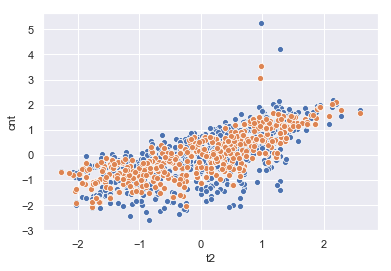

In [37]:
#scatterplot of this KNN model using only t2
sns.scatterplot(new2_bike_df[new2_bike_df.columns[2]], y)
sns.scatterplot(new2_bike_df[new2_bike_df.columns[2]], y_pred_nn);
